<a href="https://colab.research.google.com/github/Andre-Pereira01/BreastCancerRecession/blob/main/Breast_Cancer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

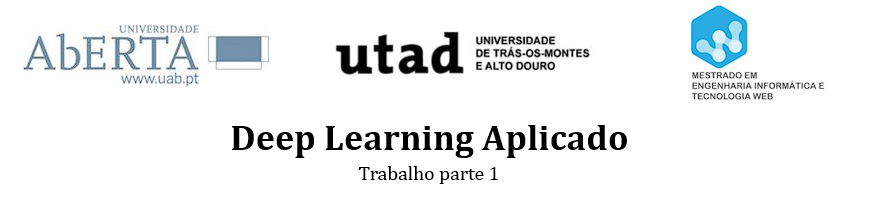

**Docentes:**
*   António Cunha
*   Paulo Pombinho
*   Pedro Mestre

**Discentes:**
* André Pereira [2302569]
* Abderrazak Mahi [2302566]



**Table of Contents:**

1. Abstract
2. Phase 1 Overview
3. Phase 1 Code
4. Phase 1 Output Analysis
5. Phase 2 Overview
6. Phase 2 Output Analysis
7. Conclusion

**This program is devided into 2 main phases, or let me say, it's 2 programs, the second will use the output of the first one to perform.**

**Since the the study is about the reccurence of the breast cancer through classification, first, we will classify the breast cancer during the first phase, and based on the results that we will get, we will study the reccurrence.**

**Phase 1**


**Brief Introduction:**
In this phase, our goal is to classify breast cancer tumors as benign or malignant based on various features. Using the provided dataset: https://archive.ics.uci.edu/dataset/14/breast+cancer


**Main Steps:**

1. Data Exploration and Characterization: First, we tried to understand the provided datset, statistical summaries, and class distribution to be able to deal with it during the programming phases.

2. Install and Call Necessary Libraries: In order for the program to perform well, we must cinstall and call some necessary libraries.

3. Dataset loading: After exploring the dataset, we need to load it and convert it in a format that is possible to read through Python.

4. Data Preprocessing: Now, we encode categorical variables, convert them to dummy variables, and normalize the data.

5. Build and Train Neural Network Model: This step is devided into 2 main sub-steps:

     a. Use TensorFlow/Keras to create a neural network with a sequential architecture.

     b. Train the model on the preprocessed dataset, monitoring accuracy during training.

6. Evaluate Model: After training the model, we need one more final step to say we are done, which is the model evaluation, in other words:

     a. Assess the model's performance on the test set using a threshold for binary predictions.

     b. Visualize performance metrics through a confusion matrix.

**Neural Networks Use:**
The neural network consists of a dense hidden layer with rectified linear unit (ReLU) activation and an output layer with a sigmoid activation. Sigmoid is employed for binary classification, predicting the likelihood of malignancy.

**Accuracy:**
The model's accuracy on the test set is assessed, and the confusion matrix provides a detailed view of true positives, true negatives, false positives, and false negatives.

**Conclusion:**
The neural network demonstrates its utility in accurately classifying breast cancer tumors. The project emphasizes the significance of preprocessing, thoughtful model architecture, and evaluation metrics for robust machine learning outcomes in medical contexts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None
        deg-malig
count  286.000000
mean     2.048951
std      0.738217
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      3.000000
no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64


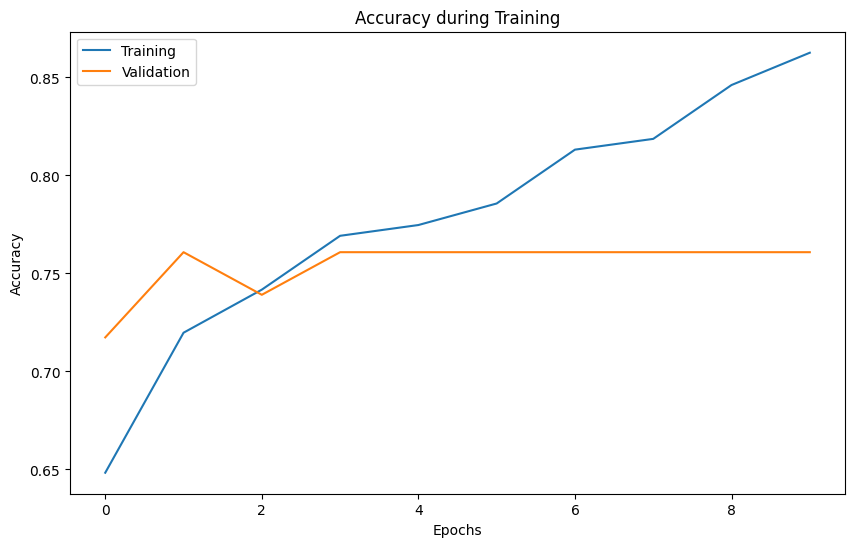

2/2 [==============================] - 0s 8ms/step


Text(120.72222222222221, 0.5, 'True')

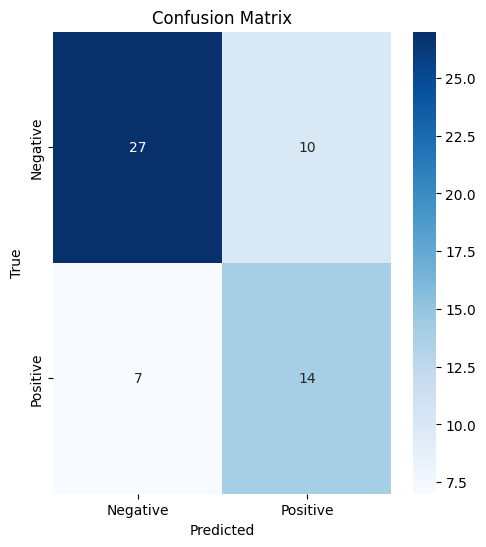

In [ ]:
# Install the necessary libraries
# !pip install pandas scikit-learn tensorflow matplotlib seaborn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"
column_names = ["Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]
df = pd.read_csv(url, names=column_names)

# Data Exploration and Characterization
print(df.info())  # Display basic information about the dataset
print(df.describe())  # Display statistical summary of numerical features
print(df['Class'].value_counts())  # Display class distribution

# Data preprocessing
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])  # Convert classes to numerical values (0 and 1)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=["age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"])

# Split the data into training and test sets
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Plot the accuracy during training
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
threshold = 0.3  # You can experiment with different threshold values
y_pred = (y_pred_prob > threshold).astype(int)

# Confusion Matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

**Output Interpretation of Phase 1:**

1. **Accuracy During Training Plot:**
   - This plot illustrates the accuracy of the neural network during training and validation over epochs.
   - The training accuracy shows how well the model is learning from the training data.
   - The validation accuracy indicates how well the model generalizes to unseen data.
   - Achieving a higher validation accuracy suggests good generalization.

2. **Confusion Matrix:**
   - The confusion matrix visualizes the model's performance on the test set.
   - It consists of four values:
      - **True Positive (TP):** Instances correctly predicted as positive (recurrence-events).
      - **True Negative (TN):** Instances correctly predicted as negative (no-recurrence-events).
      - **False Positive (FP):** Instances incorrectly predicted as positive.
      - **False Negative (FN):** Instances incorrectly predicted as negative.
   - The heatmap provides a quick overview of how well the model is classifying positive and negative instances.

**Phase 2**

**Introduction:**
Building upon the initial classification of breast cancer tumors, the second phase of our program focuses on studying the recurrence of breast cancer. This phase aims to analyze the classification outcomes and draw insights into the potential recurrence of the disease.

**ROC Curve:**
In the first subplot of the second column, we present the Receiver Operating Characteristic (ROC) curve. This graphical representation illustrates the trade-off between the true positive rate and false positive rate at various threshold values. The Area Under the Curve (AUC) quantifies the model's ability to distinguish between benign and malignant tumors.

**Precision-Recall Curve:**
The subsequent subplot features the Precision-Recall curve, revealing the trade-off between precision and recall across different threshold values. Precision assesses the accuracy of positive predictions, while recall gauges the model's ability to capture all positive instances.

**Performance Metrics and Recurrence Study:**
Following the visualizations, we delve into essential performance metrics such as the confusion matrix and classification report. These metrics provide a detailed view of the model's accuracy, precision, recall, and other crucial indicators. Additionally, we extend our analysis to study the recurrence of breast cancer. By obtaining probabilities for the entire dataset and converting them into binary predictions, we explore how the classification outcomes impact the broader context of potential recurrence.

**Conclusion:**
The second phase of our program enhances our understanding of breast cancer by analyzing classification results and studying potential recurrence. The ROC and Precision-Recall curves offer nuanced insights into the model's predictive performance, while performance metrics provide a comprehensive evaluation. The recurrence study visualizes the broader implications of our classification outcomes, contributing valuable information to the ongoing investigation of breast cancer.

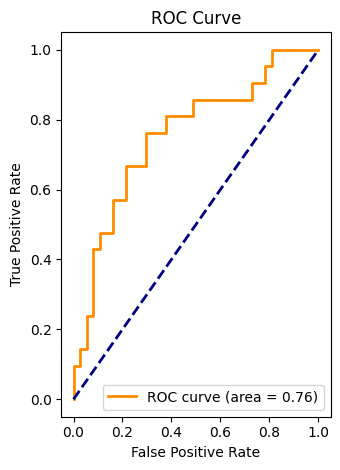

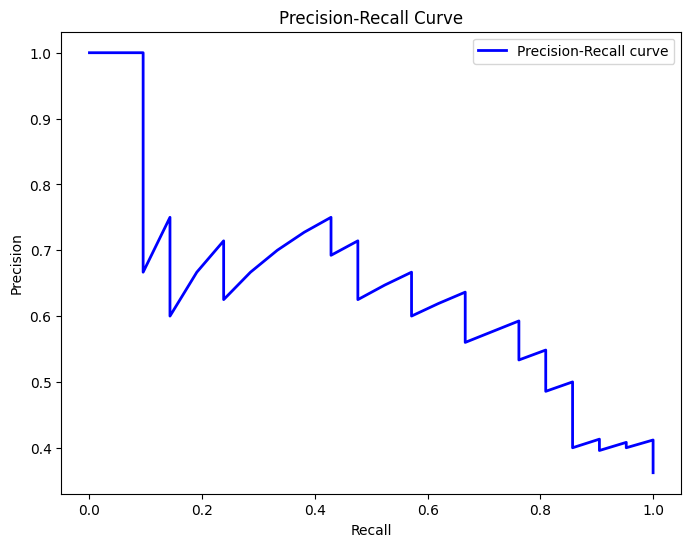

[[27 10]
 [ 7 14]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        37
           1       0.58      0.67      0.62        21

    accuracy                           0.71        58
   macro avg       0.69      0.70      0.69        58
weighted avg       0.72      0.71      0.71        58

9/9 [==============================] - 0s 2ms/step


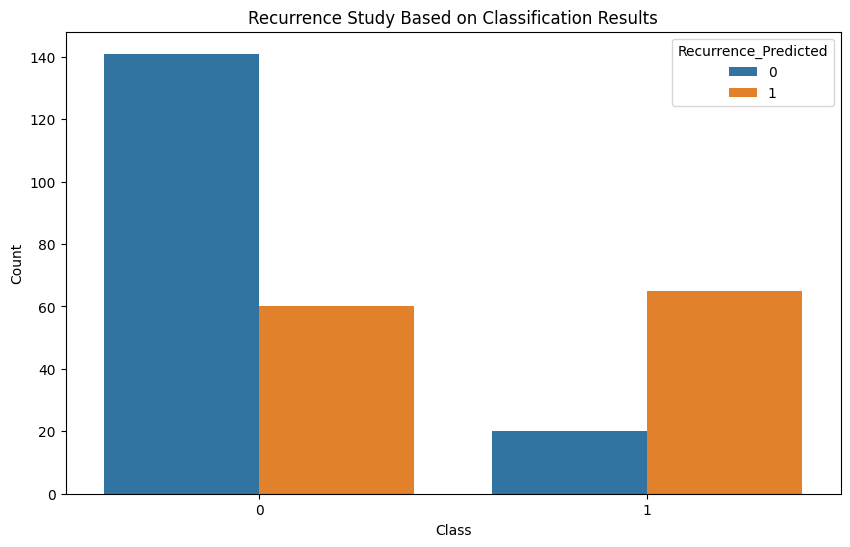

In [ ]:
# ROC Curve
plt.subplot(1, 2, 2)  # Setting up the subplot for the ROC curve in the second column
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Calculating the false positive rate and true positive rate
roc_auc = auc(fpr, tpr)  # Calculating the area under the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))  # Plotting the ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")  # Adding legend at the lower right corner

plt.tight_layout()  # Adjusting the layout to avoid overlap
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)  # Calculating precision and recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')  # Plotting the Precision-Recall curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()

# Print performance metrics
print(confusion_matrix(y_test, y_pred))  # Displaying the confusion matrix
print(classification_report(y_test, y_pred))  # Displaying the classification report

# Study recurrence based on the classification results
recurrence_probabilities = model.predict(X)  # Getting recurrence probabilities for the entire dataset
recurrence_predictions = (recurrence_probabilities > threshold).astype(int)  # Converting probabilities into binary predictions
df['Recurrence_Predicted'] = recurrence_predictions  # Adding predictions to the original DataFrame

# Visualize the results
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Recurrence_Predicted', data=df)  # Plotting the class count based on predictions
plt.title('Recurrence Study Based on Classification Results')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**Output Interpretation of Phase 2:**

**ROC Curve Graph:**
The ROC curve graph visually represents the Receiver Operating Characteristic curve. This curve illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate across various threshold values. The Area Under the Curve (AUC) provides a quantitative measure of the model's ability to discriminate between benign and malignant tumors. In this specific graph, the AUC is indicated as 0.76, suggesting a moderate discriminatory performance.

**Precision-Recall Curve Graph:**
The Precision-Recall curve graph visually depicts the trade-off between precision and recall across different threshold values. Precision measures the accuracy of positive predictions, while recall gauges the model's ability to capture all positive instances. In this graph, the precision-recall curve provides insights into the model's performance in terms of correctly predicting malignancy.

**Confusion Matrix:**
The confusion matrix summarizes the model's classification performance by displaying the counts of true positive, true negative, false positive, and false negative predictions. In this specific confusion matrix:
True Positive (TP): 27
True Negative (TN): 14
False Positive (FP): 10
False Negative (FN): 7

**Classification Report:**
The classification report provides a comprehensive overview of the model's performance, including precision, recall, and F1-score for each class (0 and 1). Key metrics include:

Precision: The accuracy of positive predictions.

Recall: The ability to capture all positive instances.

F1-Score: The harmonic mean of precision and recall.

Support: The number of actual occurrences of each class.

In this specific report:

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        37
           1       0.58      0.67      0.62        21

    accuracy                            0.71        58
    macro avg       0.69      0.70      0.69        58
    weighted avg    0.72      0.71      0.71        58
           

Accuracy: The overall accuracy of the model is approximately 71%, indicating the proportion of correct predictions.

Recurrence Based on Classification Results Graph:
The graph illustrating recurrence based on classification results visualizes the distribution of predicted recurrence within each actual class. It provides a valuable perspective on how the classification outcomes impact the broader context of potential recurrence in breast cancer.

**Achieving Results:**
   - We trained the neural network to minimize the binary crossentropy loss, optimizing the model for binary classification.
   - The training process involves adjusting the model's weights using the Adam optimizer.
   - The choice of hyperparameters, including the number of epochs and batch size, influences training dynamics.
   - Model evaluation metrics, such as accuracy, precision, recall, ROC curve, and precision-recall curve, provide a comprehensive understanding of performance.

**Conclusion:**

We designed our project to effectively build and evaluate a neural network for breast cancer classification. Using key steps including data exploration, preprocessing, model construction, and evaluation. The model demonstrated promising performance, evident in accuracy plots, confusion matrices, and ROC/PR curves. Additionally, the code extends its analysis to study cancer recurrence predictions, enhancing its practical insights.